In [1]:
ls

drive/  sample_data/


In [6]:
cd /content/drive/MyDrive/cnn

/content/drive/MyDrive/cnn


In [3]:
pwd

'/content/drive/MyDrive/cnn'

In [7]:
!unzip Animal_Dataset.zip

Archive:  Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Tes

## Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True,vertical_flip=True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/cnn/dataset/Training",target_size=(64,64),class_mode ="categorical",batch_size = 24 )

Found 1238 images belonging to 4 classes.


In [30]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/cnn/dataset/Testing",target_size=(64,64),class_mode ="categorical",batch_size = 24 )

Found 326 images belonging to 4 classes.


In [13]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

CNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [16]:
# intialize
model = Sequential()

In [17]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape = (64,64,3)))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [24]:
model.add(Dense(4,activation = "softmax"))

In [25]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [31]:
len(x_train)

14

In [32]:
model.fit(x_train, epochs = 10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
14/14 [==============================] - 7s 462ms/step - loss: 2.5809 - accuracy: 0.2791 - val_loss: 1.3510 - val_accuracy: 0.2699
Epoch 2/10
14/14 [==============================] - 6s 415ms/step - loss: 1.2150 - accuracy: 0.4509 - val_loss: 0.9841 - val_accuracy: 0.7301
Epoch 3/10
14/14 [==============================] - 7s 511ms/step - loss: 0.8646 - accuracy: 0.7393 - val_loss: 0.6057 - val_accuracy: 0.8344
Epoch 4/10
14/14 [==============================] - 6s 427ms/step - loss: 0.5112 - accuracy: 0.8528 - val_loss: 0.3082 - val_accuracy: 0.9417
Epoch 5/10
14/14 [==============================] - 6s 421ms/step - loss: 0.3095 - accuracy: 0.9018 - val_loss: 0.3219 - val_accuracy: 0.8988
Epoch 6/10
14/14 [==============================] - 6s 432ms/step - loss: 0.2028 - accuracy: 0.9479 - val_loss: 0.1639 - val_accuracy: 0.9601
Epoch 7/10
14/14 [==============================] - 6s 418ms/step - loss: 0.0996 - accuracy: 0.9847 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 

In [38]:
model.save('animal.h5')

Testing the model

In [34]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model = load_model('animal.h5')

In [40]:
img = image.load_img(r"/content/drive/MyDrive/cnn/dataset/Testing/elephants/Z (13).jpeg")

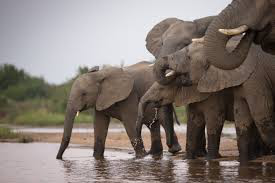

In [41]:
img

In [42]:
img = image.load_img(r"/content/drive/MyDrive/cnn/dataset/Testing/elephants/Z (13).jpeg",target_size=(64,64))

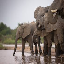

In [43]:
img

In [44]:
x = image.img_to_array(img)

In [45]:
x

array([[[139., 137., 148.],
        [142., 140., 151.],
        [146., 144., 155.],
        ...,
        [ 86.,  68.,  56.],
        [ 63.,  46.,  36.],
        [ 79.,  62.,  54.]],

       [[141., 139., 150.],
        [144., 142., 153.],
        [147., 145., 156.],
        ...,
        [ 74.,  56.,  46.],
        [ 66.,  49.,  41.],
        [ 55.,  38.,  30.]],

       [[142., 140., 151.],
        [144., 142., 153.],
        [148., 146., 157.],
        ...,
        [ 77.,  60.,  50.],
        [ 53.,  38.,  31.],
        [ 55.,  38.,  30.]],

       ...,

       [[172., 160., 162.],
        [177., 165., 167.],
        [180., 168., 170.],
        ...,
        [ 89.,  73.,  58.],
        [ 56.,  40.,  25.],
        [ 52.,  36.,  23.]],

       [[175., 159., 160.],
        [178., 162., 163.],
        [175., 159., 160.],
        ...,
        [ 68.,  52.,  39.],
        [ 57.,  41.,  28.],
        [ 90.,  73.,  65.]],

       [[170., 154., 155.],
        [173., 157., 158.],
        [172., 1

In [49]:
x = np.expand_dims(x,axis = 0)

In [50]:
x

array([[[[139., 137., 148.],
         [142., 140., 151.],
         [146., 144., 155.],
         ...,
         [ 86.,  68.,  56.],
         [ 63.,  46.,  36.],
         [ 79.,  62.,  54.]],

        [[141., 139., 150.],
         [144., 142., 153.],
         [147., 145., 156.],
         ...,
         [ 74.,  56.,  46.],
         [ 66.,  49.,  41.],
         [ 55.,  38.,  30.]],

        [[142., 140., 151.],
         [144., 142., 153.],
         [148., 146., 157.],
         ...,
         [ 77.,  60.,  50.],
         [ 53.,  38.,  31.],
         [ 55.,  38.,  30.]],

        ...,

        [[172., 160., 162.],
         [177., 165., 167.],
         [180., 168., 170.],
         ...,
         [ 89.,  73.,  58.],
         [ 56.,  40.,  25.],
         [ 52.,  36.,  23.]],

        [[175., 159., 160.],
         [178., 162., 163.],
         [175., 159., 160.],
         ...,
         [ 68.,  52.,  39.],
         [ 57.,  41.,  28.],
         [ 90.,  73.,  65.]],

        [[170., 154., 155.],
       

In [52]:
pred = model.predict(x)

1/1 [==============================] - 0s 28ms/step


In [53]:
pred

array([[0., 0., 1., 0.]], dtype=float32)

In [54]:
x_test.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [55]:
index = ['bears','crows','elephants','rats']

In [56]:
index[np.argmax(pred)]

'elephants'